# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

Automated facial expression recognition provides an objective assessment of emotions. Human based assessment of emotions has many limitations and biases and automated facial expression technology has been found to deliver a better level of insight into behavior patterns. Emotion detection from facial expressions using AI is useful in automatically measuring consumers’ engagement with their content and brands, audience engagement for advertisements, customer satisfaction in the retail sector, psychological analyses, law enforcement etc.

In [ ]:
#@title Explanation Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Hackathon3b_expression_recognition.mp4" type="video/mp4">
</video>
""")

**Objectives:** 

**Stage 4 (15 Marks):** Train a CNN Model and perform Expression Recognition in the EFR Mobile App.

**Stage 5 (5 Marks):** Test for Anti-Face Spoofing on the EFR Mobile App.

##**Stage 4 (15 Marks)**

**(i) Train a CNN Model for Expression Recognition on given Expression data  
(ii) Deploy the Model and Perform Expression Recognition on Team Data through the EFR Mobile App**


---


* Define and train a CNN for expression recognition for the data under folder "Expression_data" which segregated on expression basis.
* Collect your team data using EFR application and test your model on the same and optimize the CNN architecture for predicting the respective labels of the images.
* Save and Download the trained expression model and upload them in the ftp server (refer to [Filezilla Installation and Configuration document](https://drive.google.com/file/d/1laYeOFoHQdIcyo7y7K8kfvB6bNZs2C9B/view?usp=sharing)).

* Update the **“exp_recognition.py”** file in the server. Open the files in the terminal (Command prompt) and provide the code for predicting the expression on the face (Note: To define the architecture of your trained model, you'll need to define it in the file **"exp_recognition_model.py"**). 

* Test your model on the mobile app for Expression Recognition and Sequence Expression. Your team can also see your results in your terminal.


* Grading Scheme:
> * Expression Recognition (12M): If the functionality is returning expression class correctly for the face using the mobile app’s “Expression Recognition” functionality
> * Sequence Expression (3M): Get three consecutive correct Expressions using the mobile app’s “Sequence Expressions” functionality

**Download the dataset**

In [ ]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()
  
notebook="M3_Hackathon" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Expression_data.zip")
    
    ipython.magic("sx unzip Expression_data.zip")
    
    ipython.magic("sx pip install torch==1.0.1 -f https://download.pytorch.org/whl/cu100/stable")
    ipython.magic("sx pip install torchvision==0.2.1")
    ipython.magic("sx pip install opencv-python")
    print ("Setup completed successfully")
    return
setup()

Setup completed successfully


**Dataset attributes:**

During the setup you have downloaded the Expression data:

* **Expression_data**: In this folder, the images are segregrated in terms of Expression
> * Expressions available: ANGER, DISGUST, FEAR, HAPPINESS, NEUTRAL, SADNESS, SURPRISE
> * Each class is organised as one folder
> * There are ~18000 total images in the training data and ~4500 total images in the testing data

In [ ]:
%ls

Expression_data/  Expression_data.zip  __MACOSX/  sample_data/


**Imports: All the imports are defined here**

We are installing the following specific package versions -> torch 1.0.1, torchvision 0.2.1 and PIL 5.3.0 to maintain compatibility with the server 

* Firstly uninstall and downgrade the current PIL version. In the next cell, you will see a button "Restart Runtime" button appear below. 
* Click on it and select 'Yes' to restart runtime and reset the PIL package. 
* **DO NOT** go to the notebook's **RUNTIME  -> RESTART RUNTIME**. This will restart all packages and you will need to repeat all the steps from beginning.


* Simply continue with the next code cell

PIL (Pillow) is the Python Image Library. Used to cut and resize images, or do simple manipulation.


In [ ]:
!pip uninstall -y Pillow

Uninstalling Pillow-7.0.0:
  Successfully uninstalled Pillow-7.0.0


In [ ]:
# IGNORE ERROR. Click on Restart Runtime button and slect 'Yes' if prompts. Then proceed with the next code cell.
!pip install Pillow==5.3.0

     |████████████████████████████████| 2.0MB 3.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
# When you run this, it should give you pil version = 5.3.0
import PIL
print(PIL.__version__)

5.3.0


In [ ]:
%matplotlib inline
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
#from torchvision import datasets, models
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps    
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import os
import warnings
from time import sleep
import sys
warnings.filterwarnings('ignore')

For the following step, to obtain hints on building a CNN model for face expression, you may refer to this [article](https://drive.google.com/open?id=1P2rpaWW3tOtGGnw4dvtdZ4hjoc8iDNst)

**Define and train a CNN model for expression recognition**

In [ ]:
# YOUR CODE HERE to define and train CNN model for Expression_Data.
#Creating DataLoader
image_size = (256,256)
loader = transforms.Compose([   transforms.Resize(image_size),
                                transforms.Grayscale(), 
                                transforms.ToTensor()])
                                #transforms.Normalize((0.5),(0.5))])

train_set = dset.ImageFolder('/content/Expression_data/Facial_expression_train', transform = loader)

In [ ]:
len(train_set)

18178

In [ ]:
# YOUR CODE HERE for the DataLoader
batch_size = 32
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True);

In [ ]:
for i in range(len(train_loader)):
  print(train_loader.dataset[i][1])

In [ ]:
# # YOUR CODE HERE for the CNN model   
# class CNN_Model(nn.Module):
#     def __init__(self):
#         super(CNN_Model, self).__init__()#1*128*128
#         self.layer1 = nn.Sequential(
#             nn.Conv2d(1, 64, kernel_size=7,stride=1, padding=3), #128-7+6 + 1   ==> 64*128*128
#             nn.BatchNorm2d(64),
#             nn.Dropout(0.5),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, padding=0,stride=2)) #64*64*64
#         self.layer2 = nn.Sequential(
#             nn.Conv2d(64, 48, kernel_size=5,stride=1, padding=2), #64-5+4 +1 ==>  48*64*64
#             nn.BatchNorm2d(48),
#             nn.Dropout(0.2),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, padding= 0, stride=2)) #48*32*32 (w-f+2p)/s + 1
#         self.layer3 = nn.Sequential(
#             nn.Conv2d(48, 32, kernel_size=7,stride=1, padding=3), #32-7+6+1  32*32*32
#             nn.BatchNorm2d(32),
#             #nn.Dropout(0.2),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, padding=0, stride=2))#48*16*16
#         self.layer4 = nn.Sequential(
#             nn.Conv2d(32, 16, kernel_size=7,stride=1, padding=3), #16-7+6+1  16*16*16
#             nn.BatchNorm2d(16),
#             nn.Dropout(0.2),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, padding =0, stride=2)) #16*8*8
        
#         self.fc = nn.Sequential(
#             nn.Linear(16*8*8, 500),
#             nn.ReLU(),
#             nn.Linear(500, 250),
#             nn.ReLU(),
#             nn.Linear(250, 50),
#             nn.ReLU(),
#             nn.Linear(50,7))
#             # nn.ReLU(),
#             # nn.Linear(50, 2))
#             #nn.ReLU(),
#             #nn.Linear(80,2))
            
#     def forward(self, x):
#         out = self.layer1(x)
#         out = self.layer2(out)
#         out = self.layer3(out)
#         out = self.layer4(out)
#         #print("The shape is ", out.shape)
#         out = out.view(-1,16*8*8)# Flatenning
#         #print("The shape after is ", out.shape)
#         out = self.fc(out)
#         return F.log_softmax(out, dim=1)

In [ ]:
# YOUR CODE HERE for the CNN model   
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()#1*256*256
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=7,stride=1, padding=3), #256-7+6 + 1   ==> 64*256*256
            nn.BatchNorm2d(64),
            #nn.Dropout(0.5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, padding=0,stride=4)) #64*64*64
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 48, kernel_size=7,stride=1, padding=3), #64-5+4 +1 ==>  48*64*64
            nn.BatchNorm2d(48),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, padding= 0, stride=2)) #48*32*32 (w-f+2p)/s + 1
        self.layer3 = nn.Sequential(
            nn.Conv2d(48, 32, kernel_size=5,stride=1, padding=2), #32-5+4+1  32*32*32
            nn.BatchNorm2d(32),
            #nn.Dropout(0.2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, padding=0, stride=2))#32*16*16
        self.layer4 = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=5,stride=1, padding=2), #16-5+4+1  16*16*16
            nn.BatchNorm2d(16),
            #nn.Dropout(0.2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, padding=0, stride=2))#16*8*8
    
        self.fc = nn.Sequential(
            nn.Linear(16*8*8, 512),
            nn.ReLU(),
            nn.Linear(512, 250),
            nn.ReLU(),
            nn.Linear(250, 100),
            nn.ReLU(),
            nn.Linear(100, 7))
            
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)        
        out = out.view(-1,16*8*8)# Flatenning
        #print("The shape after is ", out.shape)
        out = self.fc(out)
        return F.log_softmax(out, dim=1)

In [ ]:
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

Using PyTorch version: 1.0.1 CUDA: True
cuda:0


In [ ]:
# YOUR CODE HERE for declaring the loss function and optimizer  
model = CNN_Model()   #CNN()
model = model.to(device)
criterion = nn.NLLLoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=.001);
optimizer = torch.optim.Adam(model.parameters(), lr=.001) 
#optimizer = optim.SGD(model.parameters(), lr=.0005, momentum=0.9, weight_decay=5e-4)

In [ ]:
losses = []
correct = 0.0
total = 0.0
NUM_EPOCHS = 50

In [ ]:
# YOUR CODE HERE 
#model = model.to(device)
# Record loss and accuracy of the train dataset
for epoch in range(NUM_EPOCHS):
    for i, (X_train, y_label) in enumerate(train_loader):
        #print(X_train.size(), y_label.size())
        #X_train = Variable(X_train.float())
        #y_label = Variable(y_label)
        X_train, y_label = X_train.cuda(), y_label.cuda()
        # Forward + Backward + Optimize

        optimizer.zero_grad()
        outputs = model(X_train)
        #print(outputs.shape)
        loss = criterion(outputs, y_label)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        _,pred = torch.max(outputs.data,1)
        #print(pred)
        total += y_label.size(0)
        #print("the actual label is ",y_label)
        # correct is incremented by the numer of predictions which are correct (equal to the ground truth labels)
        correct += (pred == y_label).sum().item()
        #print((pred == labels).sum())
        
        if (i+1) % 50 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, 15, i+1, len(train_set)//batch_size, loss.item()))
               
            print(f'Accuracy of Train Data: {100 * correct/total}')

print(f'Accuracy of random Train Data: {100 * correct/total}')

Epoch : 1/15, Iter : 50/568,  Loss: 1.8029
Accuracy of Train Data: 28.875
Epoch : 1/15, Iter : 100/568,  Loss: 1.7913
Accuracy of Train Data: 29.9375
Epoch : 1/15, Iter : 150/568,  Loss: 1.8702
Accuracy of Train Data: 29.604166666666668
Epoch : 1/15, Iter : 200/568,  Loss: 1.8338
Accuracy of Train Data: 29.171875
Epoch : 1/15, Iter : 250/568,  Loss: 1.6358
Accuracy of Train Data: 29.55
Epoch : 1/15, Iter : 300/568,  Loss: 1.6811
Accuracy of Train Data: 29.583333333333332
Epoch : 1/15, Iter : 350/568,  Loss: 1.7326
Accuracy of Train Data: 29.625
Epoch : 1/15, Iter : 400/568,  Loss: 1.7053
Accuracy of Train Data: 29.7265625
Epoch : 1/15, Iter : 450/568,  Loss: 1.5022
Accuracy of Train Data: 29.979166666666668
Epoch : 1/15, Iter : 500/568,  Loss: 1.6787
Accuracy of Train Data: 30.175
Epoch : 1/15, Iter : 550/568,  Loss: 1.7455
Accuracy of Train Data: 30.414772727272727
Epoch : 2/15, Iter : 50/568,  Loss: 1.7492
Accuracy of Train Data: 30.710890888866416
Epoch : 2/15, Iter : 100/568,  Loss

In [ ]:
state = {'cnn_dict': model.state_dict()}
torch.save(state,'./cnn_81.t7')

**Test your model and optimize CNN architecture for predicting the labels correctly**

In [ ]:
test_set = dset.ImageFolder('/content/Expression_data/Facial_expression_test', transform = loader)
dataloader_val = DataLoader(dataset=test_set, batch_size=32, shuffle=True);

In [ ]:
len(test_set),len(dataloader_val)

(4548, 143)

In [ ]:
# YOUR CODE HERE for test evaluation
model.eval()
correct_val = 0.0
total_val = 0.0
for  X_test, y_test in dataloader_val:
    #X_test = Variable(X_test.float())
    
    #print(y_test)
    X_test, y_test = X_test.to(device), y_test.to(device)
    
    outputs_val = model(X_test)
    #print(outputs_val.shape)
    _, predicted = torch.max(outputs_val.data,1)
    #print(predicted)
    #print(outputs.data)
    total_val += y_test.size(0)
    #print("the actual label",y_test)
    #correct_val += pred.eq(y_test.data).to(device).sum()
    correct_val += (predicted == y_test).sum()
print('Test Accuracy of the model on validation images: %.4f %%' % ( 100 * correct_val / total_val))
print(correct_val,total_val)

Test Accuracy of the model on validation images: 37.0000 %
tensor(1702, device='cuda:0') 4548.0


**Team Data Collection (activate the server first)** 

  - (This can be done on the day of the Hackathon once the login username and password are given)

Activate the Server Access
* Open the terminal (Command Prompt)
* Login to SSH by typing **ssh (username)@aiml-sandbox1.talentsprint.com**. Give the login username which is given to you. 

Eg: `ssh b14h3gxx@aiml-sandbox1.talentsprint.com`

  (If it is your first time connecting to the server from this computer, accept the connection by typing "yes".)
* After logging into SSH, please activate your virtual environment using the
command **source venv/bin/activate** and then press enter
* You can start the server by giving the command **sh runserver.sh** and then press enter.
* In order to collect team data in mobile app, ensure the server is active


**Collect your team data using the EFR Mobile App and fine-tune the CNN for expression data on your team**

Team Data Collection

* Follow the "Mobile_APP_Documentation" to collect the Expression photos of your team. These will be stored in the server to which login is provided to you.

[Mobile_APP_Documentation](https://drive.google.com/file/d/1cF2wwn_h_Fr2GhvurnES9MuoUqMNTesa/view?usp=sharing)


**Download your team expression data from the EFR app into your colab notebook using the links provided below**

NOTE: Replace the string "username" with your login username (such as b14h3gxx) in the below cell for expression images. 

This data will be useful for testing the above trained cnn networks.

In [ ]:
!wget -nH --recursive --no-parent --reject 'index.*' https://aiml-sandbox.talentsprint.com/expression_detection/b14h3g08/captured_images_with_Expression/ --cut-dirs=3  -P ./captured_images_with_Expression

--2020-08-27 12:24:14--  https://aiml-sandbox.talentsprint.com/expression_detection/b14h3g08/captured_images_with_Expression/
Resolving aiml-sandbox.talentsprint.com (aiml-sandbox.talentsprint.com)... 139.162.203.12
Connecting to aiml-sandbox.talentsprint.com (aiml-sandbox.talentsprint.com)|139.162.203.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./captured_images_with_Expression/index.html.tmp’

index.html.tmp          [ <=>                ]   1.03K  --.-KB/s    in 0s      

2020-08-27 12:24:14 (89.8 MB/s) - ‘./captured_images_with_Expression/index.html.tmp’ saved [1054]

Loading robots.txt; please ignore errors.
--2020-08-27 12:24:14--  https://aiml-sandbox.talentsprint.com/robots.txt
Reusing existing connection to aiml-sandbox.talentsprint.com:443.
HTTP request sent, awaiting response... 404 Not Found
2020-08-27 12:24:15 ERROR 404: Not Found.

Removing ./captured_images_with_Expression/index.html.tmp since it should

In [ ]:
%ls

(158, 158, 3)


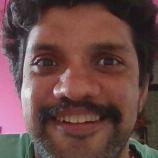

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

im1 = cv2.imread('/content/captured_images_with_Expression/HAPPINESS/HAPPINESS_1598164004.jpg')
print(im1.shape)
cv2_imshow(im1)

In [ ]:
# YOUR CODE HERE for loading the team expression data. Note: Use the same transform which used for Expression_Data.
# YOU CODE HERE for Dataloader
team_set = dset.ImageFolder('/content/captured_images_with_Expression', transform = loader)
dataloader_team = DataLoader(dataset=team_set, batch_size=
                             1, shuffle=True);

In [ ]:
len(team_set)

98

In [ ]:
myModel = CNN_Model()
ckpt = torch.load('/content/cnn_81.t7')
myModel.load_state_dict(ckpt['cnn_dict'])

In [ ]:
myModel = myModel.cuda()
optimizer = torch.optim.Adam(myModel.parameters(), lr=.001) 

In [ ]:
losses = []
correct = 0.0
total = 0.0
#NUM_EPOCHS = 30

In [ ]:
# YOUR CODE HERE for getting the CNN representation of your team data with expression. Optimize the CNN model for predicting the labels of expressions correctly
myModel.eval()
for epoch in range(50):
    for i, (img, label) in enumerate(dataloader_team):
        #print(X_train.size(), y_label.size())
        #X_train = Variable(X_train.float())
        #y_label = Variable(y_label)
        img, label = img.cuda(), label.cuda()
        # Forward + Backward + Optimize

        optimizer.zero_grad()
        output = myModel(img)
        #print(outputs.shape)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        _,pred_t = torch.max(output.data,1)
        #print(pred)
        total += label.size(0)
        #print("the actual label is ",y_label)
        # correct is incremented by the numer of predictions which are correct (equal to the ground truth labels)
        correct += (pred_t == label).sum().item()
        #print((pred == labels).sum())
        
        if (i+1) % 1 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, 15, i+1, len(team_set)//batch_size, loss.item()))
               
            print(f'Accuracy of Train Data: {100 * correct/total}')

print(f'Accuracy of random Train Data: {100 * correct/total}')

Streaming output truncated to the last 5000 lines.
Epoch : 27/15, Iter : 70/3,  Loss: 0.0000
Accuracy of Train Data: 94.7054698457223
Epoch : 27/15, Iter : 71/3,  Loss: 0.0000
Accuracy of Train Data: 94.70732562215213
Epoch : 27/15, Iter : 72/3,  Loss: 0.0000
Accuracy of Train Data: 94.70918009810792
Epoch : 27/15, Iter : 73/3,  Loss: 0.0000
Accuracy of Train Data: 94.71103327495622
Epoch : 27/15, Iter : 74/3,  Loss: 0.0000
Accuracy of Train Data: 94.71288515406162
Epoch : 27/15, Iter : 75/3,  Loss: 0.0000
Accuracy of Train Data: 94.71473573678684
Epoch : 27/15, Iter : 76/3,  Loss: 0.0000
Accuracy of Train Data: 94.71658502449266
Epoch : 27/15, Iter : 77/3,  Loss: 0.0000
Accuracy of Train Data: 94.71843301853795
Epoch : 27/15, Iter : 78/3,  Loss: 0.0000
Accuracy of Train Data: 94.72027972027972
Epoch : 27/15, Iter : 79/3,  Loss: 0.0000
Accuracy of Train Data: 94.72212513107306
Epoch : 27/15, Iter : 80/3,  Loss: 0.0000
Accuracy of Train Data: 94.72396925227113
Epoch : 27/15, Iter : 81/3

**Save your trained model**

* Save the state dictionary of the classifier (use pytorch only), It will be useful in
integrating model to the mobile app

 [Hint](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

In [ ]:
### YOUR CODE HERE for saving the CNN model
torch.save(state,'cnn_team_new_97.t7')

**Download your trained model**
* Given the path of model file the following code downloads it through the browser

In [ ]:
from google.colab import files
files.download('/content/cnn_team_new_97.t7')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**Stage 5 (Anti Face Spoofing): (5 marks)**


---



The objective of anti face spoofing is to be able to unlock (say) a screen not just by your image
(which can be easily be spoofed with a photograph of yours) but by a switch in the expression
demanded by the Mobile App (which is much less probable to mimic)
* **Grading scheme**:
> * **Anti Face Spoofing**: (5M Only if both the cases mentioned below are achieved)
>>* **Unlock**: Correct face + Correct Demanded Expression
>>* **Stay Locked**: Correct face + Incorrect Demanded Expression (as you might imagine there are multiple other such possibilities, which you are free to explore)

In [ ]:
# Test in your mobile app and see if it gets unlock.